In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat  # Added import for loading .mat files

# Set up
sub = 'LL'
save_fig = 1

# Manage path
cur_dir = os.getcwd()
project_dir = os.path.dirname(os.path.dirname(cur_dir))
out_dir = os.path.join(cur_dir, 's1Fig')
data_dir = os.path.join(project_dir, 'data', 'uniLoc')
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

In [70]:
# Clean
all_ses = ['A', 'V']

loc = []
estMu = []
sdMu = []
conf = []

for s in all_ses:
    data = loadmat(os.path.join(data_dir, f'uniLoc_sub-{sub}_ses-{s}.mat'))  # Use loadmat to load .mat file

    ExpInfo = np.squeeze(data["ExpInfo"])
    sortedResp = np.squeeze(data['sortedResp'])

    nRep = int(ExpInfo['nRep'].squeeze())
    nLevel = int(ExpInfo['nLevel'].squeeze())

    # Localization data
    loc_rep = sortedResp['target_cm'].reshape(nLevel, nRep)
    loc.append(loc_rep[:, 0]) # Only take the first repetition because locations are the same for all
    est = sortedResp['response_cm'].reshape(nLevel, nRep)

    estMu.append(np.mean(est, axis=1))
    sdMu.append(np.std(est.astype(float), axis=1))  

    # Confidence data
    temp_conf = sortedResp['conf_radius_cm'].reshape(nLevel, nRep)
    conf.append(temp_conf)

loc = np.array(loc)
estMu = np.array(estMu)
sdMu = np.array(sdMu)
conf = np.array(conf)

('target_idx', 'target_pixel', 'target_cm', 'target_deg', 'RT1', 'response_pixel', 'response_cm', 'response_deg', 'RT2', 'conf_radius_pixel', 'conf_radius_cm', 'enclosed', 'maxPtPossible', 'point')
('coordinates', 'dot_x_mu_pixel', 'dot_y_mu_pixel', 'dot_x_sd_pixel', 'dot_y_sd_pixel', 'target_idx', 'target_pixel', 'target_cm', 'target_deg', 'RT1', 'response_pixel', 'response_cm', 'response_deg', 'RT2', 'conf_radius_pixel', 'conf_radius_cm', 'enclosed', 'maxPtPossible', 'point')


## Line plot of localization responses

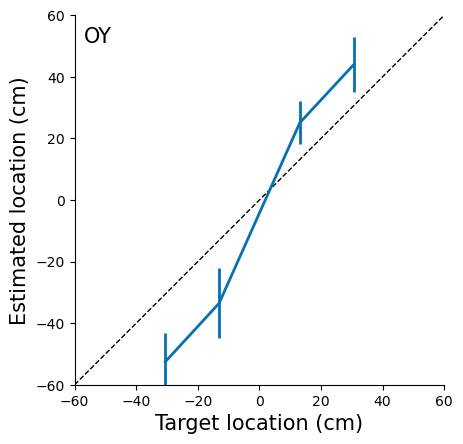

In [40]:
# Plot
lw = 2
fontSZ = 15
titleSZ = 20
clt = np.array([[5, 113, 176], [202, 0, 32]]) / 255  # red and blue

plt.figure()
limax = 60

for i, s in enumerate(all_ses):
    if s == 'A':
        plt.plot([-limax, limax], [-limax, limax], 'k--', linewidth=lw/2)
        e = plt.errorbar(loc[i], estMu[i], yerr=sdMu[i], color=clt[i], linewidth=lw)
        e[0].set_color(clt[i]) 

plt.xlim([-limax, limax])
plt.ylim([-limax, limax])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Target location (cm)', fontsize=fontSZ)
plt.ylabel('Estimated location (cm)', fontsize=fontSZ)

# Remove the upper and right axis
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add the subject identifier at the right top corner
plt.text(0.1, 0.97, sub, horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=fontSZ)

plt.show()

## Violin plot of the confidence judgements

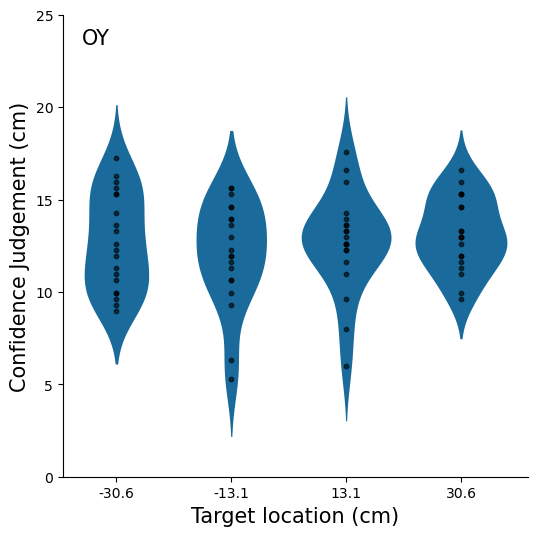

In [76]:
import seaborn as sns

# Generate violin plot for confidence judgements for session 'A'
session_index = all_ses.index('A')
conf_A = conf[session_index]

plt.figure(figsize=(6, 6))  # Adjusted width to make the figure narrower
sns.violinplot(data=[c.flatten() for c in conf_A], inner=None, linewidth=0, color=clt[0])

# Overlay raw data points
for i, c in enumerate(conf_A):
    plt.scatter([i] * len(c.flatten()), c.flatten(), color='black', s=10, alpha=0.6)

# Use loc[0] for session 'A' as x-axis labels
plt.xticks(ticks=range(len(loc[0])), labels=[round(label[0][0], 1) for label in loc[0]])
plt.ylim([0, 25])
plt.xlabel('Target location (cm)', fontsize=fontSZ)
plt.ylabel('Confidence Judgement (cm)', fontsize=fontSZ)

# Remove the upper and right axis
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add the subject identifier at the right top corner
plt.text(0.1, 0.97, sub, horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=fontSZ)
plt.show()
